#  递归与分形图

自然界的很多事物，其外形非常复杂，经典几何学无法对其进行描述。不过经仔细观察后，会发现这一类事物的形状往往具有这样的特点： 如果将形状的局部放大，会发现其与形状整体有相似性。这一类图形被称为分形。
分形几何学是专门研究分形的一门学科，借助计算机辅助做图，我们可以深入直观的观察和理解分形。本章将介绍几种常见的分形图案以及如何使用Python绘制它们。

## Koch曲线

瑞典数学家Helge von Koch，在1904年发表的“从初等几何构造的一条没有切线的连续曲线”的论文中提出Korch曲线。它的描述如下：

* 指定一条线段的长度l（可以理解为第0次迭代）
* 将这条线段三等分，并以中间的线段为底边构造一个等边三角形，然后去掉底边
* 对2中生成的曲线的每一条边重复2的操作（每操作一次称为一次迭代）

最终得到的集合图形长度为：
${{L=l∗(\frac{4}{3})^N}}$

其中的N指的是迭代次数。

**绘制方法：**
* 如果N=0，直接画出L长的直线即可
* 如果N=1（第一次迭代），画出长度为L/3的线段；画笔向左转60度再画长度为L/3长的线段；画笔向右转120度画长度为L/3长的线段；画笔再向左转60度画出长度为L/3的线段

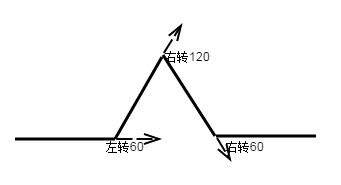

* 如果n>1，第n次迭代相当于：n-1次迭代；画笔左转60度；n-1次迭代；画笔右转120度；n-1次迭代；画笔左转60度；n-1次迭代。

以下是一段使用Python Turtle模块绘制科赫曲线的代码，它不能够在ipython环境下运行。


In [ ]:
# -*- coding: utf-8 -*-
import turtle

Division = 3.0 
DirectionAangle = [('left',60),('right',120),('left',60)]

def call(name):
    if name == 'left':
        return turtle.left
    else:
        return turtle.right

def koch(n, length):
    if n==0:
        turtle.forward(length)   
    else:
        for DA in DirectionAangle:
            koch(n-1,length/Division)
            call(DA[0])(DA[1])
        koch(n-1,length/Division)   

koch(n=2, length=100)
turtle.done()   

## 递归


递归一词还较常用于描述以自相似方法重复事物的过程。 例如，当两面镜子相互之间近似平行时，镜中嵌套的图像是以无限递归的形式出现的。 也可以理解为自我复制的过程。

在数理逻辑和计算机科学中经常使用递归的方法定义某些对象。譬如对于自然数一个递归定义：
* 1、0是一个自然数
* 2、比一个自然数大1的也是自然数
* 3、除1、2外没有自然数

以下是关于树的递归定义：
* 1、空个节点是一棵树
* 2、用一个节点将两个树连接后也是一棵树
* 除1、2外没有树


以上代码中，我们看到函数koch()调用了它自身。在数学与计算机科学中，函数的定义中使用函数自身的方法被称为递归（英語：Recursion），又译为递回。递归算法是一种直接或者间接调用自身函数或者方法的算法。递归算法的实质是把原问题分解成规模缩小的同类子问题，然后递归调用相同的方法来求问题的解。递归算法可以使算法简洁和易于理解。递归算法能使代码变得非常简洁和直观，从而使编码得以简化，最终以小的代码量解决比较复杂的问题。

递归算法解决问题的特点：
* 在方法里调用自身。
* 必须有一个明确的递归结束条件，称为递归出口。


　　

以下是matplotlib中的一段示例代码，该段代码使用递归的方法生成科赫雪花每个顶点的坐标，然后调用pyplot.fill函数绘制多边形。

In [39]:
import numpy
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    返回科赫雪花的点坐标的两个列表x, y。

    参数
    ---------
    order : int
        递归深度。
    scale : float
        雪花的长度(底三角形的边长)。
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # 作为底的正三角形三个顶点的弧角度数
            angles = numpy.array([0, 120, 240]) + 90
            return scale / numpy.sqrt(3) * numpy.exp(numpy.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * numpy.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)   # 科赫曲线的一个端点
            p2 = numpy.roll(p1, shift=-1)             # 科赫曲线的另一个端点
            dp = p2 - p1                              # 两段点之间的向量差

            '''
            每增加一次迭代的级数，原来的两个端点之间需插入3个新的端点
            需要注意的是以下都是复数空间的运算
            '''
            new_points = numpy.empty(len(p1) * 4, dtype=numpy.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    #print(points)
    x, y = points.real, points.imag
    return x, y

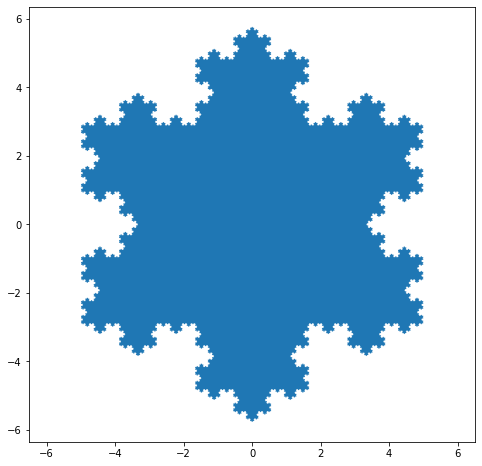

In [41]:
x, y = koch_snowflake(order=10)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

递归算法也有一些局限性。在递归调用的过程中，每一次的递归调用都需要栈空间存放每一次递归调用的返回点和局部变量。递归的层级过深容易造成栈溢出。另外递归算法的效率也比较低。所以通常情况下，递归的层级不宜过深；能够使用循环来解决的问题，不提倡用递归算法解决。

## 曼德勃罗集

曼德勃罗（Mandelbrot）集合是在复平面上组成分形的点的集合。Mandelbrot集合可以用下面的复二次多项式定义：
$${f_c(z)=z^2+c}$$
其中c是一个复数。对每一个c，通过从${z=0}$开始对${f_c(z)}$进行迭代，得到序列${(0,f_c(0),f_c(f_c(0)),f_c(f_c(f_c(0))),...)}$。
不同的参数可能使迭代值的模逐渐发散到无限大，也可能收敛在有限的区域内。曼德博集合就是使其不扩散的所有复数的集合。

关于曼德勃罗集合有以下三条定理：
* ${\text{若 }|c| \leq \frac{1}{4} \text{, 则 }c \in M}$
* ${\text{若 }c \in M \text{, 则 } |c| \leq 2}$
* ${\text{若 }c \in M \text{, 则 } |z_n| \leq 2}$

从数学上来讲，判断复平面上一个点是否属于曼德勃罗集合需要迭代无限次。程序中显然是不可能这么做，通常的方法是设置一个迭代次数的上限，只要满足这个上限即认为属于曼德勃罗集合。而图形表示时，利用这些迭代次数决定相应点的颜色，即可完成曼德勃罗集合的图形化。

具体算法如下：
* 判断每次调用函数${f_c(z)}$得到的结果是否在半径R之内，即复数的模小于R
* 记录下模大于R时的迭代次数
* 迭代最多进行N次
* 不同的迭代次数的点使用不同的颜色绘制



在编码之前，先介绍两个需要使用到的函数。第一个函数是numpy.frompyfunc()。该函数接受任意Python函数并返回一个NumPy ufunc。在前文我们已经介绍过，NumPy的ufunc可以将标量函数向量化。由于在曼德勃罗集合实质上是复平面上点的映射，因此使用向量化的映射函数，能够使得代码更加的简洁。实现向量化的计算有两种方式：直接编支持向量化运算的函数；使用numpy.frompyfunc()将标量函数向量化。

以下是将标量函数向量化的代码：


In [119]:
import numpy

def iter_point(c):
    '''
    计算复平面上某一点的迭代次数
    
    入参
    ————
    c: complex
        复平面上一点值
       
    返回
    ————
    i: int
        该点在验证定理2时可以迭代的次数
    '''
    n = 100                 # 最多迭代100次
    if (abs(c) < 1/4):      # 定理1
        return n
    z = c
    for i in range(1, n): 
        if abs(z)>2:
            break           # 半径大于2，违反定理2
        z = z*z+c
    return i                # 返回迭代次数

# 创建向量化 ufunc函数
iter_points = numpy.frompyfunc(iter_point,1,1)

iter_points

<ufunc '? (vectorized)'>

接下来，我们编写一个函数在复平面上指定的区域内绘制曼德勃罗集合的图像。对该区域将使用numpy.ogrid来实例化，代码中传给numpy.ogrid构造函数的两个入参分别是X轴和Y轴的起始值以及步长，当步长是复数时，则其幅度的整数部分将被解释为指定在起始值和终止值之间创建的点数，其中终止值包括端点值。

以下代码可以理解为将复平面上点[-9,-9]和点[9,9]之间的区域分成100份，然后生成所有顶点X和Y坐标的集合。

In [120]:
y, x = numpy.ogrid[-9:9:10j, -9:9:10j]
print(numpy.shape(x), numpy.shape(y))
print(x)
y

(1, 10) (10, 1)
[[-9. -7. -5. -3. -1.  1.  3.  5.  7.  9.]]


array([[-9.],
       [-7.],
       [-5.],
       [-3.],
       [-1.],
       [ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.]])

利用NumPy数组的广播机制则可以生成所有点对应的数值。代码如下：

In [121]:
x+y*1j

array([[-9.-9.j, -7.-9.j, -5.-9.j, -3.-9.j, -1.-9.j,  1.-9.j,  3.-9.j,
         5.-9.j,  7.-9.j,  9.-9.j],
       [-9.-7.j, -7.-7.j, -5.-7.j, -3.-7.j, -1.-7.j,  1.-7.j,  3.-7.j,
         5.-7.j,  7.-7.j,  9.-7.j],
       [-9.-5.j, -7.-5.j, -5.-5.j, -3.-5.j, -1.-5.j,  1.-5.j,  3.-5.j,
         5.-5.j,  7.-5.j,  9.-5.j],
       [-9.-3.j, -7.-3.j, -5.-3.j, -3.-3.j, -1.-3.j,  1.-3.j,  3.-3.j,
         5.-3.j,  7.-3.j,  9.-3.j],
       [-9.-1.j, -7.-1.j, -5.-1.j, -3.-1.j, -1.-1.j,  1.-1.j,  3.-1.j,
         5.-1.j,  7.-1.j,  9.-1.j],
       [-9.+1.j, -7.+1.j, -5.+1.j, -3.+1.j, -1.+1.j,  1.+1.j,  3.+1.j,
         5.+1.j,  7.+1.j,  9.+1.j],
       [-9.+3.j, -7.+3.j, -5.+3.j, -3.+3.j, -1.+3.j,  1.+3.j,  3.+3.j,
         5.+3.j,  7.+3.j,  9.+3.j],
       [-9.+5.j, -7.+5.j, -5.+5.j, -3.+5.j, -1.+5.j,  1.+5.j,  3.+5.j,
         5.+5.j,  7.+5.j,  9.+5.j],
       [-9.+7.j, -7.+7.j, -5.+7.j, -3.+7.j, -1.+7.j,  1.+7.j,  3.+7.j,
         5.+7.j,  7.+7.j,  9.+7.j],
       [-9.+9.j, -7.+9.j, -5.+9.j, -3

以上代码与以下代码等效：

In [122]:
x = numpy.linspace(-9, 9, 10)
y = numpy.linspace(-9, 9, 10).reshape(10, 1)
x+y*1j

array([[-9.-9.j, -7.-9.j, -5.-9.j, -3.-9.j, -1.-9.j,  1.-9.j,  3.-9.j,
         5.-9.j,  7.-9.j,  9.-9.j],
       [-9.-7.j, -7.-7.j, -5.-7.j, -3.-7.j, -1.-7.j,  1.-7.j,  3.-7.j,
         5.-7.j,  7.-7.j,  9.-7.j],
       [-9.-5.j, -7.-5.j, -5.-5.j, -3.-5.j, -1.-5.j,  1.-5.j,  3.-5.j,
         5.-5.j,  7.-5.j,  9.-5.j],
       [-9.-3.j, -7.-3.j, -5.-3.j, -3.-3.j, -1.-3.j,  1.-3.j,  3.-3.j,
         5.-3.j,  7.-3.j,  9.-3.j],
       [-9.-1.j, -7.-1.j, -5.-1.j, -3.-1.j, -1.-1.j,  1.-1.j,  3.-1.j,
         5.-1.j,  7.-1.j,  9.-1.j],
       [-9.+1.j, -7.+1.j, -5.+1.j, -3.+1.j, -1.+1.j,  1.+1.j,  3.+1.j,
         5.+1.j,  7.+1.j,  9.+1.j],
       [-9.+3.j, -7.+3.j, -5.+3.j, -3.+3.j, -1.+3.j,  1.+3.j,  3.+3.j,
         5.+3.j,  7.+3.j,  9.+3.j],
       [-9.+5.j, -7.+5.j, -5.+5.j, -3.+5.j, -1.+5.j,  1.+5.j,  3.+5.j,
         5.+5.j,  7.+5.j,  9.+5.j],
       [-9.+7.j, -7.+7.j, -5.+7.j, -3.+7.j, -1.+7.j,  1.+7.j,  3.+7.j,
         5.+7.j,  7.+7.j,  9.+7.j],
       [-9.+9.j, -7.+9.j, -5.+9.j, -3

现在利用以上知识，编写我们的函数，为指定区域内的点计算迭代值。代码如下：

In [123]:
import matplotlib.pyplot as plt
from matplotlib import cm

def get_mandelbrot_iter(x0, x1, y0, y1, step=200):
    """
    获得点(x0, y0)和(x1, y1)围成的矩形区域内
    Mandelbrot迭代次数。默认被划分成200X200的
    子区间。
    
    入参
    ___
    x0: float
        起始点实部
        
    y0: float
        起始点虚部
        
    x1: float
        截止点实部
        
    y1: float
        起始点需部
    
    step： int
        区间，默认200
        
    返回
    ___
    iter_matix: float array
        每一个采样点的迭代次数
    """
    y, x = numpy.ogrid[y0:y1:step*1j, x0:x1:step*1j]
    c = x + y*1j
    iter_points = numpy.frompyfunc(iter_point,1,1)
    iter_matrix = iter_points(c).astype(numpy.float)
    
    return iter_matrix

得到迭代数值之后，便可以将它们作用绘图数据利用函数imshow()绘制曼德勃集合的图形。以下是绘制复平面上特定区域中曼德勃集合的代码：

In [128]:
def draw_mandelbrot(ax, cx, cy, d):
    """
    绘制点(cx, cy)附近正负d的范围的Mandelbrot
    
    入参
    ___
    ax: Axis
        当前坐标系

    cx: float
        复平面上一点的实部
        
    cy: float
        复平面上一点的虚部
    
    d： float
        范围
        
    返回
    ____
    无    
    
    """    
    x0, x1, y0, y1 = cx-d, cx+d, cy-d, cy+d 
    mandelbrot = get_mandelbrot_iter(x0, x1, y0, y1)
    ax.imshow(mandelbrot, cmap=plt.cm.Blues_r, extent=[x0,x1,y0,y1])
    ax.set_axis_off()

接下来使用刚刚的函数在复平面上的点(-0.5,0)附件1.5的范围内绘制曼德勃集合。

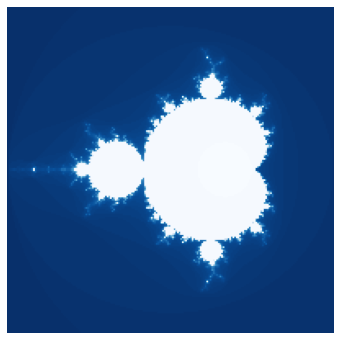

In [129]:
fig = plt.figure(figsize=(6, 6))
draw_mandelbrot(plt.gca(), -0.5, 0, 1.5)
plt.show()

接下来，我们缩小采样的区间，对曼德勃集合的图形进行局部放大。代码如下：

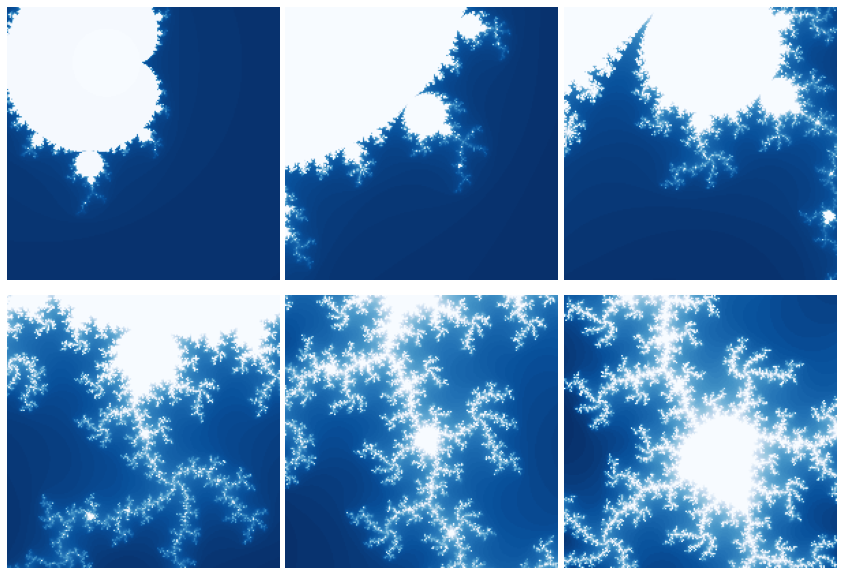

In [130]:
fig = plt.figure(figsize=(12, 8))
x,y = 0.27322626, 0.595153338
for i in range(1,7):    
    plt.subplot(230+i)
    draw_mandelbrot(plt.gca(), x, y, 0.3**(i-1))
plt.subplots_adjust(0.02, 0, 0.98, 1, 0.02, 0)
plt.show()

以上实现的代码运行的效率不高，可以使用%time测试运行时间draw_mandelbrot的运行，主要运行时间消耗在迭代的过程中。

CPU times: user 99.2 ms, sys: 30 µs, total: 99.2 ms
Wall time: 95.4 ms


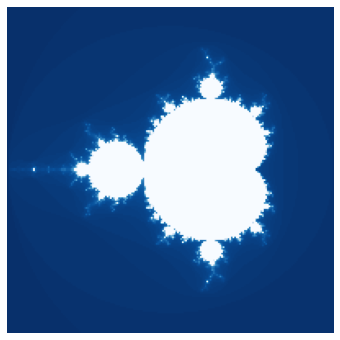

In [138]:
fig = plt.figure(figsize=(6, 6))
%time draw_mandelbrot(plt.gca(), -0.5, 0, 1.5)
plt.show()

CPU times: user 179 ms, sys: 6 µs, total: 179 ms
Wall time: 179 ms
CPU times: user 259 ms, sys: 0 ns, total: 259 ms
Wall time: 258 ms
CPU times: user 278 ms, sys: 0 ns, total: 278 ms
Wall time: 277 ms
CPU times: user 293 ms, sys: 0 ns, total: 293 ms
Wall time: 293 ms
CPU times: user 310 ms, sys: 0 ns, total: 310 ms
Wall time: 310 ms
CPU times: user 424 ms, sys: 0 ns, total: 424 ms
Wall time: 424 ms


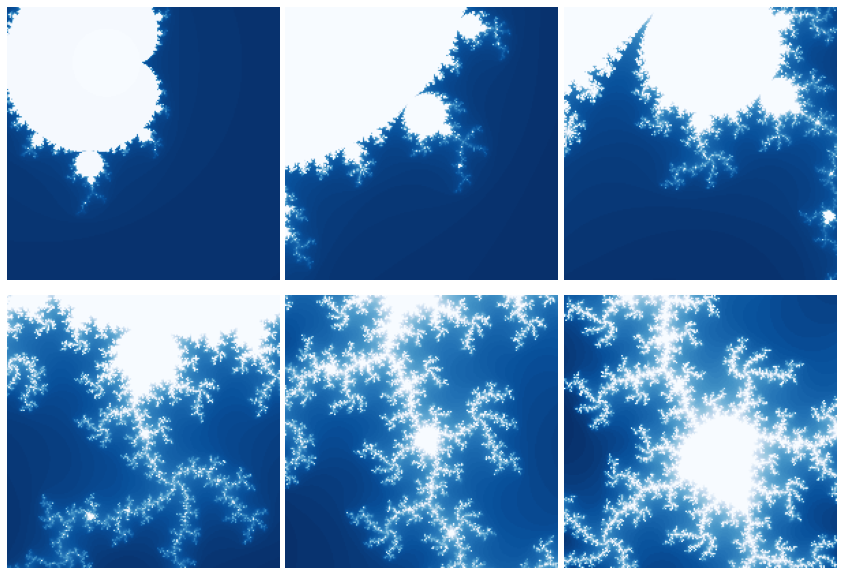

In [132]:
fig = plt.figure(figsize=(12, 8))
x,y = 0.27322626, 0.595153338
for i in range(1,7):    
    plt.subplot(230+i)
    %time draw_mandelbrot(plt.gca(), x, y, 0.3**(i-1))
plt.subplots_adjust(0.02, 0, 0.98, 1, 0.02, 0)
plt.show()

In [137]:
def get_mandelbrot_iter(x0, x1, y0, y1, step=200):
    """
    获得点(x0, y0)和(x1, y1)围成的矩形区域内
    Mandelbrot迭代次数。默认被划分成200X200的
    子区间。
    
    入参
    ___
    x0: float
        起始点实部
        
    y0: float
        起始点虚部
        
    x1: float
        截止点实部
        
    y1: float
        起始点需部
    
    step： int
        区间，默认200
        
    返回
    ___
    iter_matix: float array
        每一个采样点的迭代次数
    """
    x = np.linspace(x0, x1, step)
    y = np.linspace(y0, y1, step).reshape(step, 1)
    X,Y = numpy.meshgrid(x, y)
    
    c = np.array(X + 1j*Y, dtype=complex)
    z = np.zeros(c.shape, dtype=complex)

    bool_index = np.ones(c.shape,dtype=bool)
    matrix_map = np.ones(c.shape)

    for i in range(100):
        z[bool_index] = pow(z[bool_index],2) + c[bool_index]
        bool_index = (np.abs(z) < 2)
        matrix_map += bool_index

    return matrix_map


## 分形树叶

在数学中，迭代函数系统（iterated function system，IFS）是一种构成分形的方法。迭代函数系统下的分形，可存在于各种维度的空间中，但是一般常见于二维平面。IFS分形由数个自身的复制合并组成，每个复制皆遵循一个方程进行变换（因此称之为“函数系统”），这里的变换（函数）通常是压缩性的；换而言之，变换后点与点之间距离更近、图案压缩变小。因此，IFS分形的图形由数个自身的小副本（复制）构成（副本间可能有重合），而每个小副本又由更小的自身的副本构成，依此类推。这也是IFS分形的自相似性质的来源。典型的例子有树叶、谢宾斯基三角形。

在2维平面中有下面4个线性函数，它们可以平面上一点映射到另一个位置：

    1.

$${x(n+1)=0}$$
$${y(n+1) = 0.16 * y(n)}$$

    2.
$${x(n+1) = 0.2 * x(n) − 0.26 * y(n)}$$
$${y(n+1) = 0.23 * x(n) + 0.22 * y(n) + 1.6}$$

    3.
$${x(n+1) = −0.15 * x(n) + 0.28 * y(n)}$$
$${y(n+1) = 0.26 * x(n) + 0.24 * y(n) + 0.44}$$

    4.
$${x(n+1) = 0.85 * x(n) + 0.04 * y(n)}$$
$${y(n+1) = −0.04 * x(n) + 0.85 * y(n) + 1.6}$$

可以看到，x(n+1)是x(n)和y(n)的函数，y(n+1)也是如此。即这一次的计算要使用到上一次的结果，因此称之为迭代。这样的系统被称为迭代函数系统。给定一个初始点 x(0),y(0)，经过上面的映射函数的映射，便可以得到平面中许多点，这些点构成的图形便是分形图案。
这里共有4个映射函数，每次迭代是要使用哪一个呢？因此，还需要给每个映射函数规定一个概率，按照概率来进行选择。

首先，我们要把映射函数通过矩阵的方式描述出来，同时定义它们被使用的概率。代码如下：

In [198]:
import numpy as np
import matplotlib.pyplot as pl
import time

# 蕨类植物叶子的迭代函数和其概率值
eq1 = np.array([[0,0,0],[0,0.16,0]])
p1 = 0.01

eq2 = np.array([[0.2,-0.26,0],[0.23,0.22,1.6]])
p2 = 0.07

eq3 = np.array([[-0.15, 0.28, 0],[0.26,0.24,0.44]])
p3 = 0.07

eq4 = np.array([[0.85, 0.04, 0],[-0.04, 0.85, 1.6]])
p4 = 0.85

接下来定义迭代函数。为了减少计算时间，我们在进行迭代之前先准备好每次迭代时的随机数，并利用这些随机数生成映射函数的索引数组。具体算法是：将0～1之间按4种映射函数的概率划分成不同的区间，由0～1之间的随机数决定所选函数。
区间可以由以下代码生成：

In [199]:
p = numpy.add.accumulate([0.01, 0.07, 0.12, 0.80]) 
p

array([0.01, 0.08, 0.2 , 1.  ])

接下来，我们需要创建两个相同长度的数组rands和select，数组rands用来保存作为区间选择的随机数，数组select用来保存映射函数的编号。以下代码，假设需要迭代10次：

In [200]:
rands = numpy.random.rand(10)
select = numpy.ones(10, dtype=numpy.int)
for i, x in enumerate(p[::-1]):
    select[rands<x] = len(p)-i-1
print(rands)
select

[0.19780381 0.81588056 0.73832176 0.35602721 0.17586086 0.04872843
 0.15967947 0.32753942 0.58026012 0.51396741]


array([2, 3, 3, 3, 2, 1, 2, 3, 3, 3])

以上代码使用来NumPy数组的布尔索引，根据rands中成员所处的区间，为select数组中的成员选择相应的值。

迭代函数选好了，接着就是迭代的过程了。每次迭代选择对应的函数矩阵与被映射的点做点乘，将迭代结果存入结果数组。以下是IFS函数的实现：

In [201]:
def ifs(p, eq, init, n):
    """
    进行函数迭代
    p: 每个函数的选择概率列表
    eq: 迭代函数列表
    init: 迭代初始点
    n: 迭代次数

    返回值： 每次迭代所得的X坐标数组， Y坐标数组， 计算所用的函数下标    
    """

    # 迭代向量的初始化
    pos = numpy.ones(3, dtype=numpy.float)
    pos[:2] = init

    # 通过函数概率，计算函数的选择序列
    p = numpy.add.accumulate(p)    
    rands = numpy.random.rand(n)
    select = numpy.ones(n, dtype=numpy.int)
    for i, x in enumerate(p[::-1]):
        select[rands<x] = len(p)-i-1

    # 结果的初始化
    result = numpy.zeros((n,2), dtype=numpy.float)
    c = numpy.zeros(n, dtype=numpy.float)

    for i in range(n):
        eqidx = select[i] # 所选的函数下标
        tmp = numpy.dot(eq[eqidx], pos) # 进行迭代
        pos[:2] = tmp # 更新迭代向量

        # 保存结果
        result[i] = tmp
        c[i] = eqidx
    return result[:,0], result[:, 1], c

以上代码不仅返回来迭代的结果，还同时返回了每个点所用的映射方程的编号。我们可以利用这些编号在绘图时为不同的点选择不同的颜色，这样便于我们分析分形的不同部分分别是由哪个映射函数生成的。

以下是使用绿色生成图案的代码，关键字参数marker='s'。"s"表示正方形，方形在matplotlib中的绘制速度是最快的。linewidths=0表示绘图不需要边框。

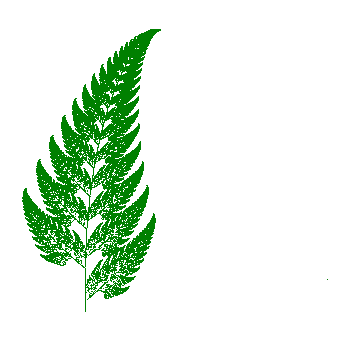

In [202]:
x, y, c = ifs([p1,p2,p3,p4],[eq1,eq2,eq3,eq4], [10,0], 100000)
plt.figure(figsize=(6,3))
plt.scatter(x, y, s=1, c="g", marker="s", linewidths=0)
plt.axis("equal")
plt.axis("off")
plt.show()

接下来，我们将函数ifs返回的c带入，这样不同映射区将会以不同颜色显示出来。代码如下：

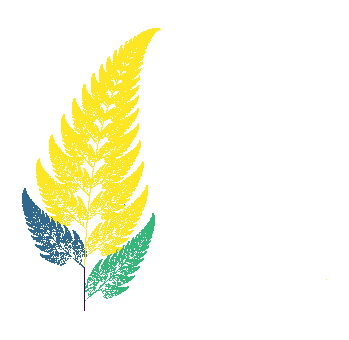

In [203]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=1,c = c, marker="s", linewidths=0)
plt.axis("equal")
plt.axis("off")
plt.show()


观察右图的4种颜色的部分可以发现概率为1%的函数1所计算的是叶杆部分(深蓝色)，概率为7%的两个函数计算的是左右两片子叶，而概率为85%的函数计算的是整个叶子的迭代：即最下面的三种颜色的点通过此函数的迭代产生上面的所有的深红色的点。

我们可以看出整个叶子呈现出完美的自相似特性，任意取其中的一个子叶，将其旋转放大之后都和整个叶子相同。

读者可以这样修改以上代码：

实验一：
以上是10万个点生成的图。如果改为1000个点，或在更少，看效果如何：

可以看出：
1、点的产生并不是从下而上累计的，而是每次都会有一定概率落在某个映射函数的结果集所在位置上，随着点数的增多，轮廓越来越明显和精细。
2、当起始点定了之后，每一个映射函数都有自己的一个映射空间，不会超出这个空间。比如两个7%的函数的映射空间就是在蓝叶子和绿叶子的轮廓中，不会跳出这个范围。

实验二：
将起始点(0,0)改为不均衡的数，如(10,1)，(-1,10)等。发现结果的形状相同。说明与起始点的值无关。这是因为，映射函数是坐标的线性变换，也是仿射变换，即不改变原有的直线性和平行性，只是进行翻转和伸缩。因此在同一个函数的作用下，两个不同位置的点进行的翻转动作是相同的，因此得到的结果形状也是相同的。

实验三：
修改函数出现的概率和映射函数

此时会影响最终生成的图形。

## 其它分形图(科赫曲线、分形龙、谢尔宾斯基三角等)

L-System（Lindenmayer system）是一种生成分形图案的方法。该方法是由荷兰乌特勒支大学的匈牙利裔生物学和植物学家林登麦伊尔（Aristid Lindenmayer）于1968年提出的，最初是用于建立有关细胞生长发展中交互作用的数学模型，也可用于生成自相似的分形。不同于迭代函数系统，L-System在生成分形时依赖的是字符的迭代。首先使用特定字符代表着一种对线条的操作，如延伸、旋转等。接着将这些字符拼接成字符串，代表一组操作。最后对字符串中的字符依次进行迭代，随着迭代次数的增加，便会得到一张分形图案。

以下是该系统中常用的一些字符及其含义：
* F/f：向前走固定长度
* +：正方向旋转固定角度
* -：负方向旋转固定角度

比如，F+F--F+F这个字符串。如果迭代规则是F=F+F--F+F，第一次迭代的结果是F+F--F+F+F+F--F+F--F+F--F+F+F+F--F+F。

假设符号+和-代表正负60度旋转，则下图分别代表0～3次迭代的结果：
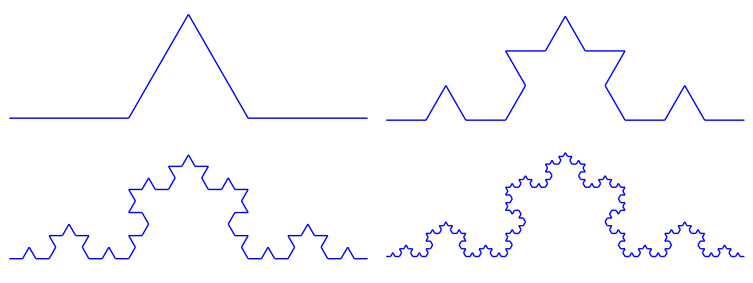

迭代可以使用字典来表述，关键字表示字符串中被替代的字符，值表示替换的字符或字符串。例如以上替代规则可以用以下代码表示：

{'F':'F+F--F+F'}

此时，我们需要一个符号来表示初始字符串。可以选择字符‘S’。以下代码表示，初始字符串为‘F’，仅有一条替换规则F=F+F--F+F。

{'F':'F+F--F+F'， ‘S’：‘F’}

为了能够生成树状结构，因此需要支持对某些节点入栈和出栈的操作。因此再引入两个符号：

* [：将当前的位置存入堆栈
* ]：从堆栈中取出坐标，修改当前位置

以下符号描述了一个树，除根节点以外，这棵树的每个非叶子节点都有2个分叉，在每个分叉上进行相同的迭代。

    S -> X    
    X -> F-[[X]+X]+F[+FX]-X    
    F -> FF
    
我们可以用一个字典定义所有的迭代公式和其它的一些绘图信息，以这棵树为例，以下代码中：

* direct : 是绘图的初始角度，通过指定不同的值可以旋转整个图案
* angle : 定义符号+,-旋转时的角度，不同的值能产生完全不同的图案
* iter : 迭代次数

In [219]:
{
    "X":"F-[[X]+X]+F[+FX]-X", "F":"FF", "S":"X",
    "direct":-45,
    "angle":25,
    "iter":6,
    "title":"Plant"
}

{'X': 'F-[[X]+X]+F[+FX]-X',
 'F': 'FF',
 'S': 'X',
 'direct': -45,
 'angle': 25,
 'iter': 6,
 'title': 'Plant'}

在开始编写代码之前，我们先对L-System的特性做进一步的分析。L-System可以代表一大类的分形，体现它们之间差异的是不同实例各自的属性——迭代规则。不同L-System的实例之间具有的共同方法是：根据迭代规则绘制分形图案。

以下代码是该类的定义。构造函数主要的功能有两部分：提取初始状态；对初始状态中的字符进行迭代替换，生成描述系统的最终字符串。方法get_lines()根据最终迭代出的操作字符串计算组成分形的每一条线段的两个端点的坐标值。方法draw_lines()将这些线段绘制出来，由于分形图案不一定是一条闭合的曲线，因此使用方法Axes.add_collection()绘制一组线段的集合，这点请读者在使用matplotlib绘图时务必留意。以下是代码：

In [21]:
from math import sin, cos, pi
import matplotlib.pyplot as plt
from matplotlib import collections

class L_System(object):
    def __init__(self, rule):
        info = rule['S']
        for i in range(rule['iter']):
            ninfo = []
            for c in info:
                if c in rule:
                    ninfo.append(rule[c])
                else:
                    ninfo.append(c)
                info = "".join(ninfo)
        self.rule = rule
        self.info = info

    def get_lines(self):
        d = self.rule['direct']
        a = self.rule['angle']
        p = (0.0, 0.0)
        l = 1.0
        lines = []
        stack = []
        for c in self.info:
            if c in "Ff":
                r = d * pi / 180
                t = p[0] + l*cos(r), p[1] + l*sin(r)
                lines.append(((p[0], p[1]), (t[0], t[1])))
                p = t
            elif c == "+":
                d += a
            elif c == "-":
                d -= a
            elif c == "[":
                stack.append((p,d))
            elif c == "]":
                p, d = stack[-1]
                del stack[-1]
        return lines
    
    def draw_lines(self, ax):
        lines = self.get_lines()
        linecollections = collections.LineCollection(lines, color = "k",)
        ax.add_collection(linecollections, autolim=True)
        ax.axis("equal")
        ax.set_axis_off()
        ax.set_xlim(ax.dataLim.xmin, ax.dataLim.xmax)
        ax.invert_yaxis()


现在，我们为科赫曲线定义一套规则，并使用这套规则定义具体的实例并绘制科赫曲线，代码如下

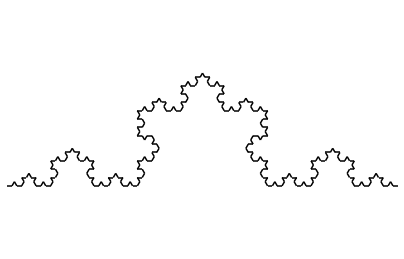

In [42]:
rulesKoch = {
    "F":"F+F--F+F", "S":"F",
    #"F":"F+F--F+F", "S":"F--F--F",  # Snowflower
    "direct":180,
    "angle":60,
    "iter":4,
    "title":"Koch"
    }

Koch = L_System(rulesKoch)
fig = pl.figure(figsize=(7, 4.5))
Koch.draw_lines(plt.gca())

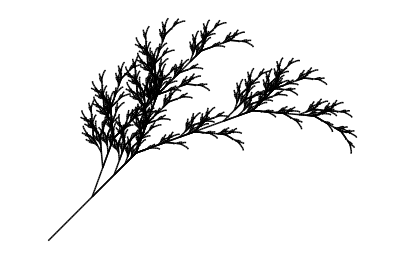

In [31]:
plant_rule = {
    "X":"F-[[X]+X]+F[+FX]-X", "F":"FF", "S":"X",
    "direct":-45,
    "angle":25,
    "iter":6,
    "title":"Plant"
}

plant = L_System(plant_rule)
fig = pl.figure(figsize=(7, 4.5))
plant.draw_lines(plt.gca())


以下是使用L-system绘制几种常见分形的代码：

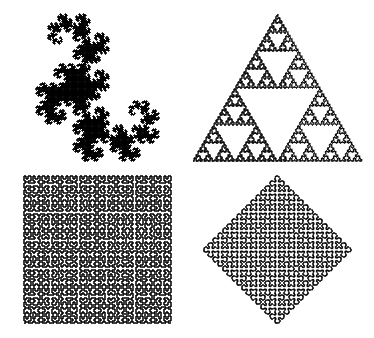

In [43]:
rules = [
    {
    "X":"X+YF+", "Y":"-FX-Y", "S":"FX",
    "direct":0,
    "angle":90,
    "iter":13,
    "title":"Dragon"
    },
    {
    "f":"F-f-F", "F":"f+F+f", "S":"f",
    "direct":0,
    "angle":60,
    "iter":7,
    "title":"Triangle"
    },
    {
    "S":"X", "X":"-YF+XFX+FY-", "Y":"+XF-YFY-FX+",
    "direct":0,
    "angle":90,
    "iter":6,
    "title":"Hilbert"
    },
    {
    "S":"L--F--L--F", "L":"+R-F-R+", "R":"-L+F+L-",
    "direct":0,
    "angle":45,
    "iter":10,
    "title":"Sierpinski"
    },

]

fig = pl.figure(figsize=(5, 4.5))

for i in range(4):
    ax = fig.add_subplot(221+i)
    lines = L_System(rules[i]).draw_lines(ax)

fig.subplots_adjust(left=0,right=1,bottom=0,top=1,wspace=0,hspace=0)
pl.show()